## Week 3: Geospatial Data Analysis and GeoPandas

Sep 19, 2022

## Housekeeping

- [Homework #1](https://github.com/MUSA-550-Fall-2022/assignment-1) due today
- [Homework #2](https://github.com/MUSA-550-Fall-2022/assignment-2) due two weeks from today (10/3)
- Choose a dataset to visualize and explore
    - [OpenDataPhilly](https://opendataphilly.org) or one your choosing
    - Email me if you want to analyze one that's not on OpenDataPhilly

## Agenda for Week #3

**First:** altair data viz exercise

**Then:**

- Vector data and introduction to GeoPandas
- Spatial relationships and joins
- Visualization for geospatial data
- Demo: 311 requests by neighborhood in Philadelphia
- Exercise: Property assessments by neighborhood

In [1]:
# Let's setup the imports we'll need first
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import altair as alt

## Exercise: Measles incidence data viz with altair

**Exercise**: let's reproduce this famous Wall Street Journal visualization showing measles incidence over time. 

http://graphics.wsj.com/infectious-diseases-and-vaccines/

## Step 1: Load the data

### First confirm the local path of the Jupyter notebook

- Use two magic Jupyter functions: `pwd` and `ls` 
- See [the docs](https://ipython.readthedocs.io/en/stable/interactive/magics.html) for the full list of builtin magic functions

In [2]:
# Print out the current working directory
%pwd

'/Users/nhand/Teaching/PennMUSA/Fall2022/week-3'

In [3]:
# List all of the current working directories 
%ls

README.md
altair-data-bab009db68fd5baeb0b3f2a47a0e775a.json
altair-data-c88ae29f5e52292f57ec56d169bfc4e9.json
altair-data-d676c5169a80f978f8cf008b5d336e79.json
data/
environment.yml
lecture-3A.ipynb
lecture-3B.ipynb
outline.md


In [4]:
path = './data/measles_incidence.csv' # this is a relative path 
data = pd.read_csv(path, skiprows=2, na_values='-')
data.head()

,YEAR,WEEK,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,...,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
0,1928,1,3.67,NaN,1.90,4.11,1.38,8.38,4.50,8.58,...,5.69,22.03,1.18,0.4,0.28,NaN,14.83,3.36,1.54,0.91
1,1928,2,6.25,NaN,6.40,9.91,1.80,6.02,9.00,7.30,...,6.57,16.96,0.63,NaN,0.56,NaN,17.34,4.19,0.96,NaN
2,1928,3,7.95,NaN,4.50,11.15,1.31,2.86,8.81,15.88,...,2.04,24.66,0.62,0.2,1.12,NaN,15.67,4.19,4.79,1.36
3,1928,4,12.58,NaN,1.90,13.75,1.87,13.71,10.40,4.29,...,2.19,18.86,0.37,0.2,6.70,NaN,12.77,4.66,1.64,3.64
4,1928,5,8.03,NaN,0.47,20.79,2.38,5.13,16.80,5.58,...,3.94,20.05,1.57,0.4,6.70,NaN,18.83,7.37,2.91,0.91


**Note:** data is *weekly*

## Step 2: Calculate the total incidents in a given year per state

**Hints**
- You'll want to take the sum over weeks to get the annual total — you can take advantage of the `groupby()` then `sum()` work flow. 
- It will be helpful if you drop the `WEEK` column — you don't need that in the grouping operation

In [5]:
# drop week first
annual = data.drop('WEEK', axis=1)

In [6]:
grped = annual.groupby('YEAR')
print(grped)

In [7]:
annual = grped.sum()


annual.head()

,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,FLORIDA,...,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
YEAR,,,,,,,,,,,,,,,,,,,,,
1928,334.99,0.0,200.75,481.77,69.22,206.98,634.95,256.02,535.63,119.58,...,160.16,315.43,97.35,16.83,334.80,0.0,344.82,195.98,124.61,227.00
1929,111.93,0.0,54.88,67.22,72.80,74.24,614.82,239.82,94.20,78.01,...,167.77,33.04,71.28,68.90,105.31,0.0,248.60,380.14,1016.54,312.16
1930,157.00,0.0,466.31,53.44,760.24,1132.76,112.23,109.25,182.10,356.59,...,346.31,179.91,73.12,1044.79,236.69,0.0,631.64,157.70,748.58,341.55
1931,337.29,0.0,497.69,45.91,477.48,453.27,790.46,1003.28,832.99,260.79,...,212.36,134.79,39.56,29.72,318.40,0.0,197.43,291.38,506.57,60.69
1932,10.21,0.0,20.11,5.33,214.08,222.90,348.27,15.98,53.14,13.63,...,96.37,68.99,76.58,13.91,1146.08,53.4,631.93,599.65,935.31,242.10


## Step 3: Transform to tidy format

You can use `melt()` to get tidy data. You should have 3 columns: year, state, and total incidence.

In [8]:
measles = annual.reset_index()
measles.head()

,YEAR,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,...,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
0,1928,334.99,0.0,200.75,481.77,69.22,206.98,634.95,256.02,535.63,...,160.16,315.43,97.35,16.83,334.80,0.0,344.82,195.98,124.61,227.00
1,1929,111.93,0.0,54.88,67.22,72.80,74.24,614.82,239.82,94.20,...,167.77,33.04,71.28,68.90,105.31,0.0,248.60,380.14,1016.54,312.16
2,1930,157.00,0.0,466.31,53.44,760.24,1132.76,112.23,109.25,182.10,...,346.31,179.91,73.12,1044.79,236.69,0.0,631.64,157.70,748.58,341.55
3,1931,337.29,0.0,497.69,45.91,477.48,453.27,790.46,1003.28,832.99,...,212.36,134.79,39.56,29.72,318.40,0.0,197.43,291.38,506.57,60.69
4,1932,10.21,0.0,20.11,5.33,214.08,222.90,348.27,15.98,53.14,...,96.37,68.99,76.58,13.91,1146.08,53.4,631.93,599.65,935.31,242.10


In [9]:
measles = measles.melt(id_vars='YEAR', value_name="incidence", var_name="state")
measles.head(n=10)

,YEAR,state,incidence
0,1928,ALABAMA,334.99
1,1929,ALABAMA,111.93
2,1930,ALABAMA,157.00
3,1931,ALABAMA,337.29
4,1932,ALABAMA,10.21
5,1933,ALABAMA,65.22
6,1934,ALABAMA,590.27
7,1935,ALABAMA,265.34
8,1936,ALABAMA,20.78
9,1937,ALABAMA,22.46


## Step 4: Make the plot

- Take a look at this [simple heatmap](https://altair-viz.github.io/gallery/simple_heatmap.html#gallery-simple--heatmap) for an example of the syntax of Altair's heatmap functionality. 
- You can use the `mark_rect()` function to encode the values as rectangles and then color them according to the average annual measles incidence per state.


You'll want to take advantage of the custom color map defined below to best match the WSJ's graphic.

In [10]:
# Define a custom colormape using Hex codes & HTML color names
colormap = alt.Scale(
    domain=[0, 100, 200, 300, 1000, 3000],
    range=[
        "#F0F8FF",
        "cornflowerblue",
        "mediumseagreen",
        "#FFEE00",
        "darkorange",
        "firebrick",
    ],
    type="sqrt",
)

## Avoiding large data error

See [the documentation](https://altair-viz.github.io/user_guide/faq.html#maxrowserror-how-can-i-plot-large-datasets) for more information.

For data sources with larger than 5,000 rows, you'll need to run the code below for Altair to work — it forces Altair save a local copy of the data.

In [11]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [12]:
measles

,YEAR,state,incidence
0,1928,ALABAMA,334.99
1,1929,ALABAMA,111.93
2,1930,ALABAMA,157.00
3,1931,ALABAMA,337.29
4,1932,ALABAMA,10.21
...,...,...,...
3871,1999,WYOMING,0.00
3872,2000,WYOMING,0.00
3873,2001,WYOMING,0.00
3874,2002,WYOMING,0.00


In [13]:
# Heatmap of YEAR vs state, colored by incidence
chart = (
   alt.Chart(measles)
    .mark_rect()
   .encode(
       x=alt.X("YEAR:O", axis=alt.Axis(title=None, ticks=False)),
       y=alt.Y("state:N", axis=alt.Axis(title=None, ticks=False)),
       color=alt.Color("incidence:Q", sort="ascending", scale=colormap),
       tooltip=["state", "YEAR", "incidence"],
   )
   .properties(width=700, height=500)
)

chart 

alt.Chart(...)

## Bonus: Add the vaccination line!

In [14]:
threshold = pd.DataFrame([{"threshold": 1963}])
threshold

,threshold
0,1963


In [15]:
# Vertical line for vaccination year
rule = alt.Chart(threshold).mark_rule(strokeWidth=4).encode(x="threshold:O")
chart + rule

alt.LayerChart(...)

**Note:** I've used the "+" shorthand operator for layering two charts on top of each other — see the documentation on [Layered Charts](https://altair-viz.github.io/user_guide/compound_charts.html#layered-charts) for more info!

## Challenges

- Do you agree with the visualization choices made by the WSJ? 
    - Try experimenting with different color scales to see if you can improve the heatmap
    - See the [names of available color maps in Altair](https://vega.github.io/vega/docs/schemes/)
- Try adding a second chart above the heatmap that shows a line chart of the annual average across all 50 states. 

## Exploring other color maps

The categorical color scale choice is properly not the best. It's best to use a perceptually uniform color scale like viridis. See below:

In [16]:
# Heatmap of YEAR vs state, colored by incidence
chart = (
    alt.Chart(measles)
    .mark_rect()
    .encode(
        x=alt.X("YEAR:O", axis=alt.Axis(title=None, ticks=False)),
        y=alt.Y("state:N", axis=alt.Axis(title=None, ticks=False)),
        color=alt.Color(
            "incidence:Q",
            sort="ascending",
            scale=alt.Scale(scheme="viridis"),
            legend=None,
        ),
        tooltip=["state", "YEAR", "incidence"],
    )
    .properties(width=700, height=450)
)

# Vertical line for vaccination year
rule = (
    alt.Chart(threshold).mark_rule(strokeWidth=4, color="white").encode(x="threshold:O")
)

chart + rule

alt.LayerChart(...)

## Add the annual average chart on top

In [17]:
# The heatmap
chart = (
    alt.Chart(measles)
    .mark_rect()
    .encode(
        x=alt.X("YEAR:O", axis=alt.Axis(title=None, ticks=False)),
        y=alt.Y("state:N", axis=alt.Axis(title=None, ticks=False)),
        color=alt.Color(
            "incidence:Q",
            sort="ascending",
            scale=alt.Scale(scheme="viridis"),
            legend=None,
        ),
        tooltip=["state", "YEAR", "incidence"],
    )
    .properties(width=700, height=400)
)

# The annual average
annual_avg = (
    alt.Chart(measles)
    .mark_line()
    .encode(
        x=alt.X("YEAR:O", axis=alt.Axis(title=None, ticks=False)),
        y=alt.Y("mean(incidence):Q", axis=alt.Axis(title=None, ticks=False)),
    )
    .properties(width=700, height=200)
)

# Add the vertical line 
rule = (
    alt.Chart(threshold).mark_rule(strokeWidth=4, color="white").encode(x="threshold:O")
)

# Combine everything
alt.vconcat(annual_avg, chart + rule)

alt.VConcatChart(...)

# Now, on to geospatial analysis...

## Vector Data


- **Vector** refers to **discrete geometric entities**
- The [Open Geospatial Consortium](https://en.wikipedia.org/wiki/Open_Geospatial_Consortium) has standardized a set of [**simple features**](https://en.wikipedia.org/wiki/Simple_Features)
- Includes points, lines, and polygons

<center>
    <img src=attachment:points-lines-polygons-vector-data-types.png width=600></img>
</center>

[Source](https://www.earthdatascience.org/workshops/gis-open-source-python/intro-vector-data-python/)
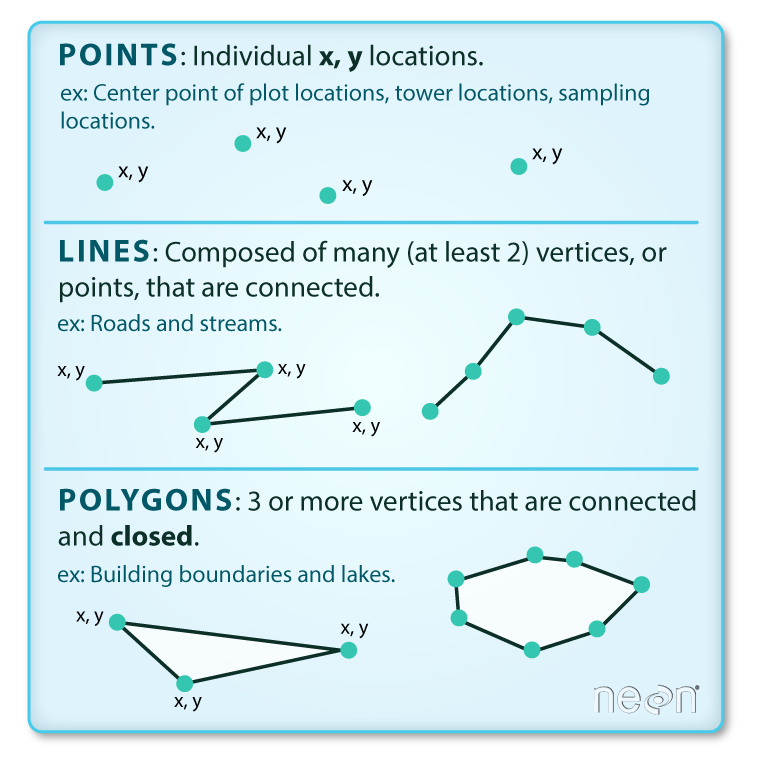

## A couple of terminology notes

- A **feature** refers to both the geometry and attributes of specific piece of vector data
- A **feature collection** is a list, or collection, of features

Both terms are very common in Python geospatial software.

## Common formats for vector datasets

## A shapefile

Actually several files with the same common prefix

Mandatory files: 

- **.shp**: the file containing the geometries
- **.shx**: the file that indexes the geometry
- **.dbf**: tabular data format storing the attributes for each geometry
    
And many optional files for documentation, projection information, etc.

Let's take a look at an example shapefile:

We'll use the `%ls` command to *list* out all of the files in an example shapefile in the `data/` folder

In [18]:
%ls "data/ne_110m_admin_0_countries/"

ne_110m_admin_0_countries.cpg  ne_110m_admin_0_countries.shp
ne_110m_admin_0_countries.dbf  ne_110m_admin_0_countries.shx
ne_110m_admin_0_countries.prj


## The GeoJSON file

- Stores simple features in a JSON format
- Arose due to the prevalence of the JSON format, especially on the web

<center>
    <img src=attachment:Screen%20Shot%202019-02-04%20at%2011.09.38%20PM.png width=600></img>
</center>
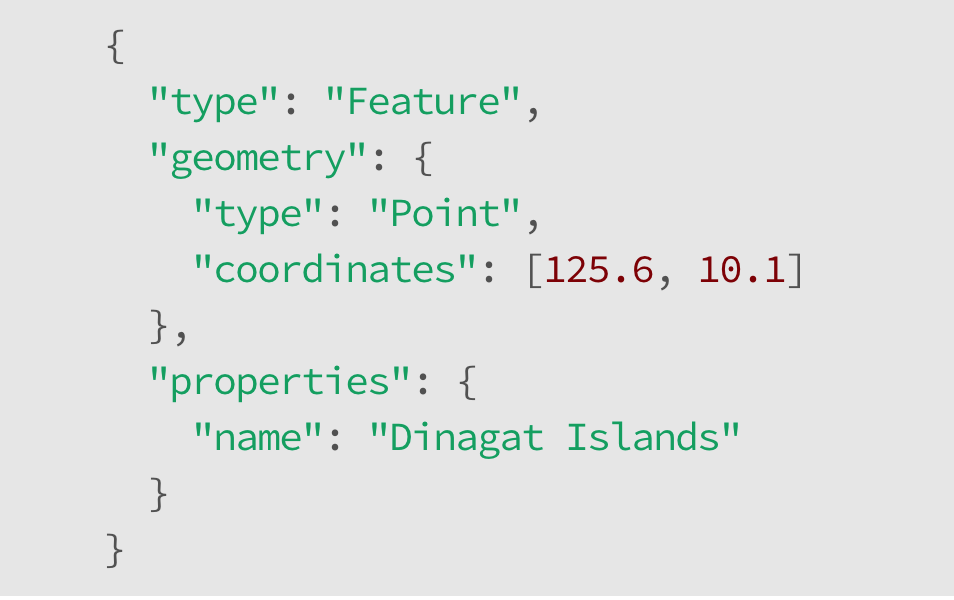

### Additional GeoJSON resources and tools:
- GitHub lets you view GeoJSON files natively 
- http://geojson.io provides interactive creation and viewing of small GeoJSON files

GitHub example from the `data/` directory: [Philadelphia ZIP Codes](https://github.com/MUSA-550-Fall-2021/week-3/blob/master/data/Zipcodes_Poly.geojson)

## Working with vector data in Python: GeoPandas

`geopandas` provides a simple, intuitive for the main types of geospatial vector file formats

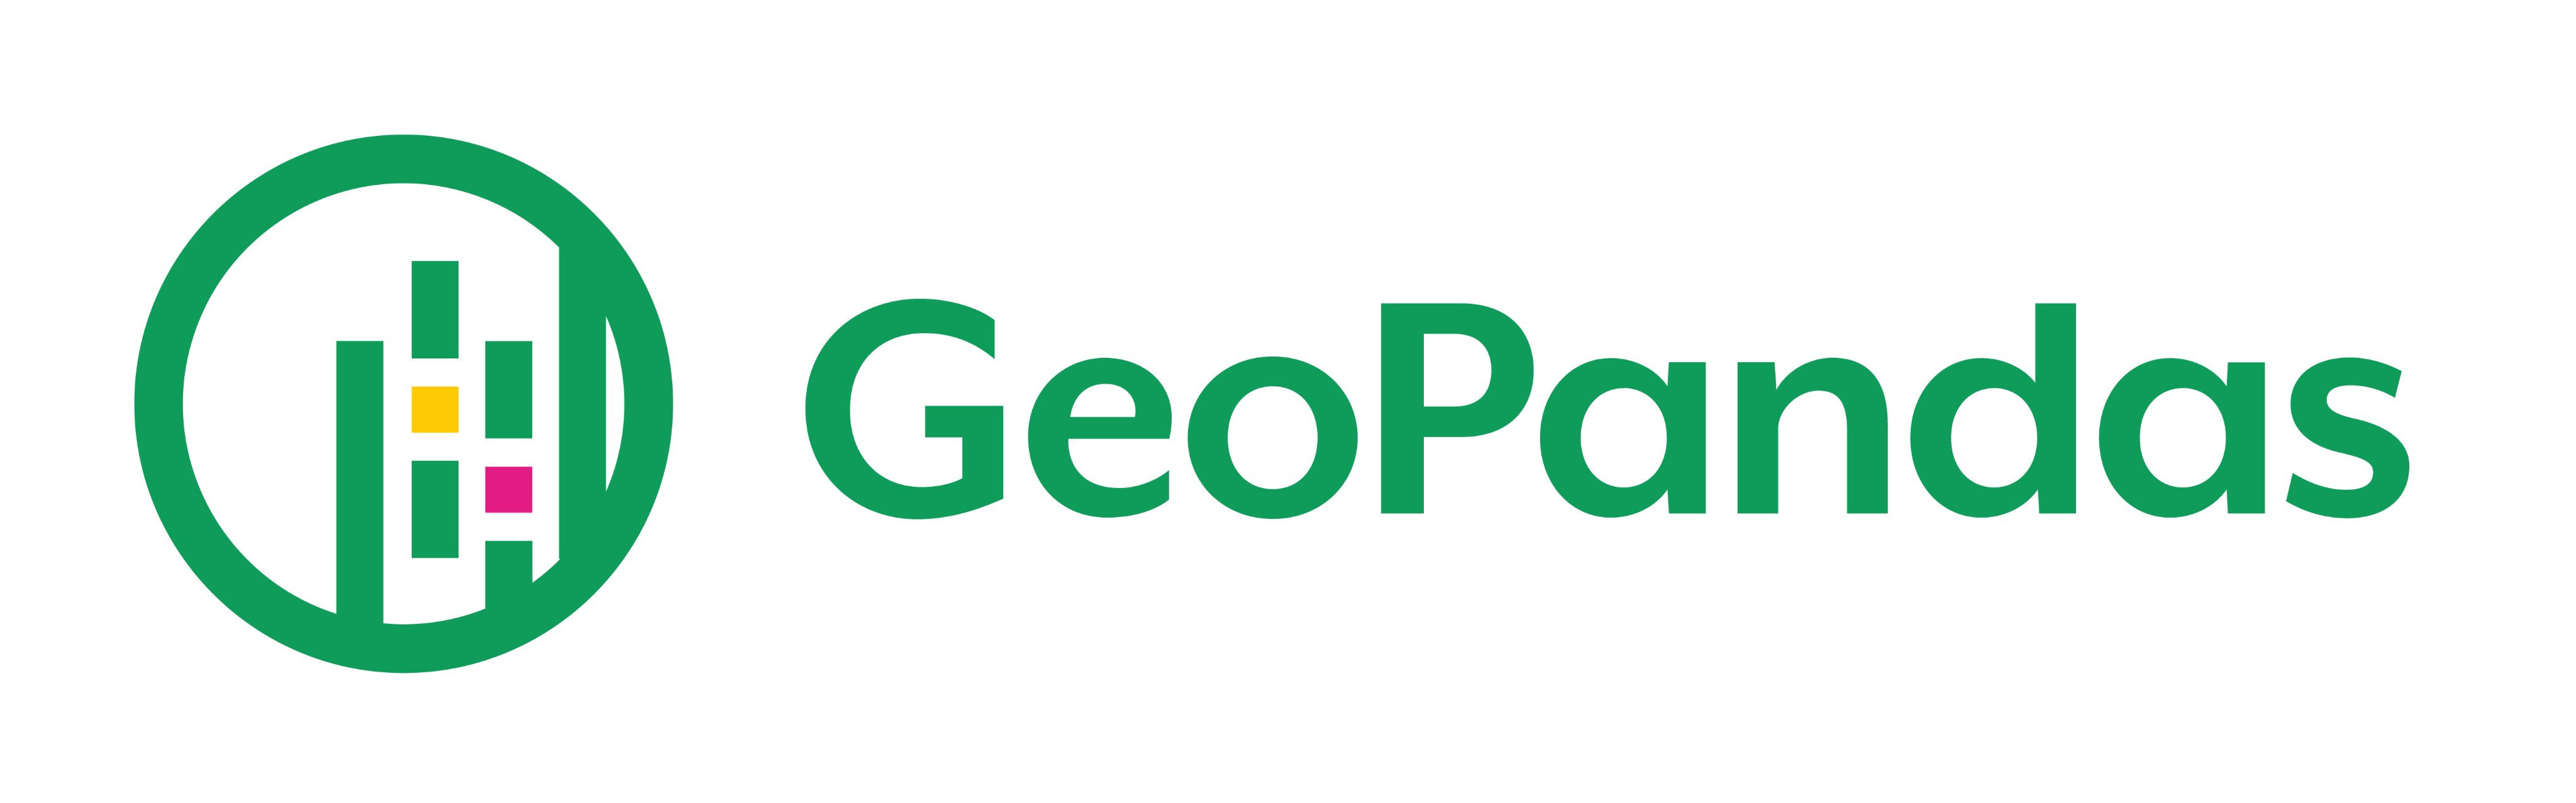

**Example:** Let's load a shape file of countries in the world...

[Source: Natural Earth Data](http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/)

In [19]:
import geopandas as gpd

We can use the [read_file()](https://geopandas.org/docs/reference/api/geopandas.read_file.html) function to read shapefiles and GeoJSON files.

In [20]:
# Read the shape file, giving the name of the directory
countries = gpd.read_file("./data/ne_110m_admin_0_countries")

In [21]:
countries.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


In [22]:
type(countries) 

geopandas.geodataframe.GeoDataFrame

## What's a `GeoDataFrame`?

Just like a `DataFrame` but with a `geometry` column

In [23]:
# Print out the first 10 entires of the "geometry" column
countries['geometry'].head(n=10)

0    POLYGON ((61.21082 35.65007, 62.23065 35.27066...
1    MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...
2    POLYGON ((21.02004 40.84273, 20.99999 40.58000...
3    POLYGON ((51.57952 24.24550, 51.75744 24.29407...
4    MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...
5    POLYGON ((43.58275 41.09214, 44.97248 41.24813...
6    MULTIPOLYGON (((-59.57209 -80.04018, -59.86585...
7    POLYGON ((68.93500 -48.62500, 69.58000 -48.940...
8    MULTIPOLYGON (((145.39798 -40.79255, 146.36412...
9    POLYGON ((16.97967 48.12350, 16.90375 47.71487...
Name: geometry, dtype: geometry

## We can still leverage the power of `pandas`...

Calculate the total world population:

In [24]:
countries['pop_est'].sum()/1e9 # In billions

7.383089462

Calculate the total population on each continent:

In [25]:
grouped = countries.groupby('continent')
grouped 

<div class="alert alert-info" style="font-size:100%">
<b>REMEMBER</b>: <br>
    Remember: the <code>groupby()</code> does not return a <code>DataFrame</code> — you need to call <code>sum()</code>, <code>mean()</code>, etc, or <code>apply()</code> a function.
</div>

In [26]:
# Sum population on each continent
pop_by_continent = grouped['pop_est'].sum()

# Sort values
pop_by_continent.sort_values(ascending=False, inplace=True)

# Output sorted values from cell
pop_by_continent/1e9

continent
Asia                       4.389145e+00
Africa                     1.219176e+00
Europe                     7.463985e-01
North America              5.730421e-01
South America              4.185407e-01
Oceania                    3.678284e-02
Antarctica                 4.050000e-06
Seven seas (open ocean)    1.400000e-07
Name: pop_est, dtype: float64

Filter the data frame based on a boolean selection:

In [27]:
# Is the country name USA?
is_USA = countries['name']=='United States of America'

# Get the row with USA
USA = countries.loc[is_USA]

USA

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
168,USA,United States of America,North America,326625791.0,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


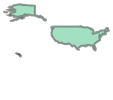

In [28]:
USA.squeeze().geometry

## An aside: the `squeeze()` function

It does just one it sounds like: if you have a DataFrame with only one row, it will "squeeze" the row dimension by removing it, returning just a Series object:

In [29]:
# Squeeze
USA = USA.squeeze()

# Print out the type
print("The type of USA is: ", type(USA))

# Output
USA

The type of USA is:  <class 'pandas.core.series.Series'>


/Users/nhand/mambaforge/envs/musa-550-fall-2022/lib/python3.9/site-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/Users/nhand/mambaforge/envs/musa-550-fall-2022/lib/python3.9/site-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/Users/nhand/mambaforge/envs/musa-550-fall-2022/lib/python3.9/site-packages/pandas/io/formats/printing.py:117: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent part

iso_a3                                                      USA
name                                   United States of America
continent                                         North America
pop_est                                             326625791.0
gdp_md_est                                           18560000.0
geometry      (POLYGON ((-122.84000000000005 49.000000000000...
Name: 168, dtype: object

The simple features (Lines, Points, Polygons) are implemented by the [shapely](https://shapely.readthedocs.io/en/stable/manual.html) library

In [30]:
type(USA.geometry)

shapely.geometry.multipolygon.MultiPolygon

Jupyter notebook renders `shapely` geometries automatically:

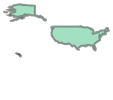

In [31]:
# a mini USA
USA.geometry 

## How does `geopandas` handle coordinate systems and map projections?



## Coordinate Reference Systems

A **coordinate reference system** (CRS) relates the position of a geometry object on the spherical earth to its two-dimensional coordinates.

A `GeoDataFrame` or `GeoSeries` has a `.crs` attribute which specifies the coordinate reference system.

In [32]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

- EPSG 4326 is known as WGS 84 where `x` and `y` are longitude and latitude. 
- It is is the default coordinate system for GPS systems.
- It's also known as Plate Carrée

## How to plot all of the geometries at once?

Use the `plot()` function to get a quick and dirty plot of all of the geometry features.

**Note:** the `plot()` returns the current maplotlib axes, allowing you to format the chart after plotting.

Text(0.5, 1.0, 'Equirectangular Projection')

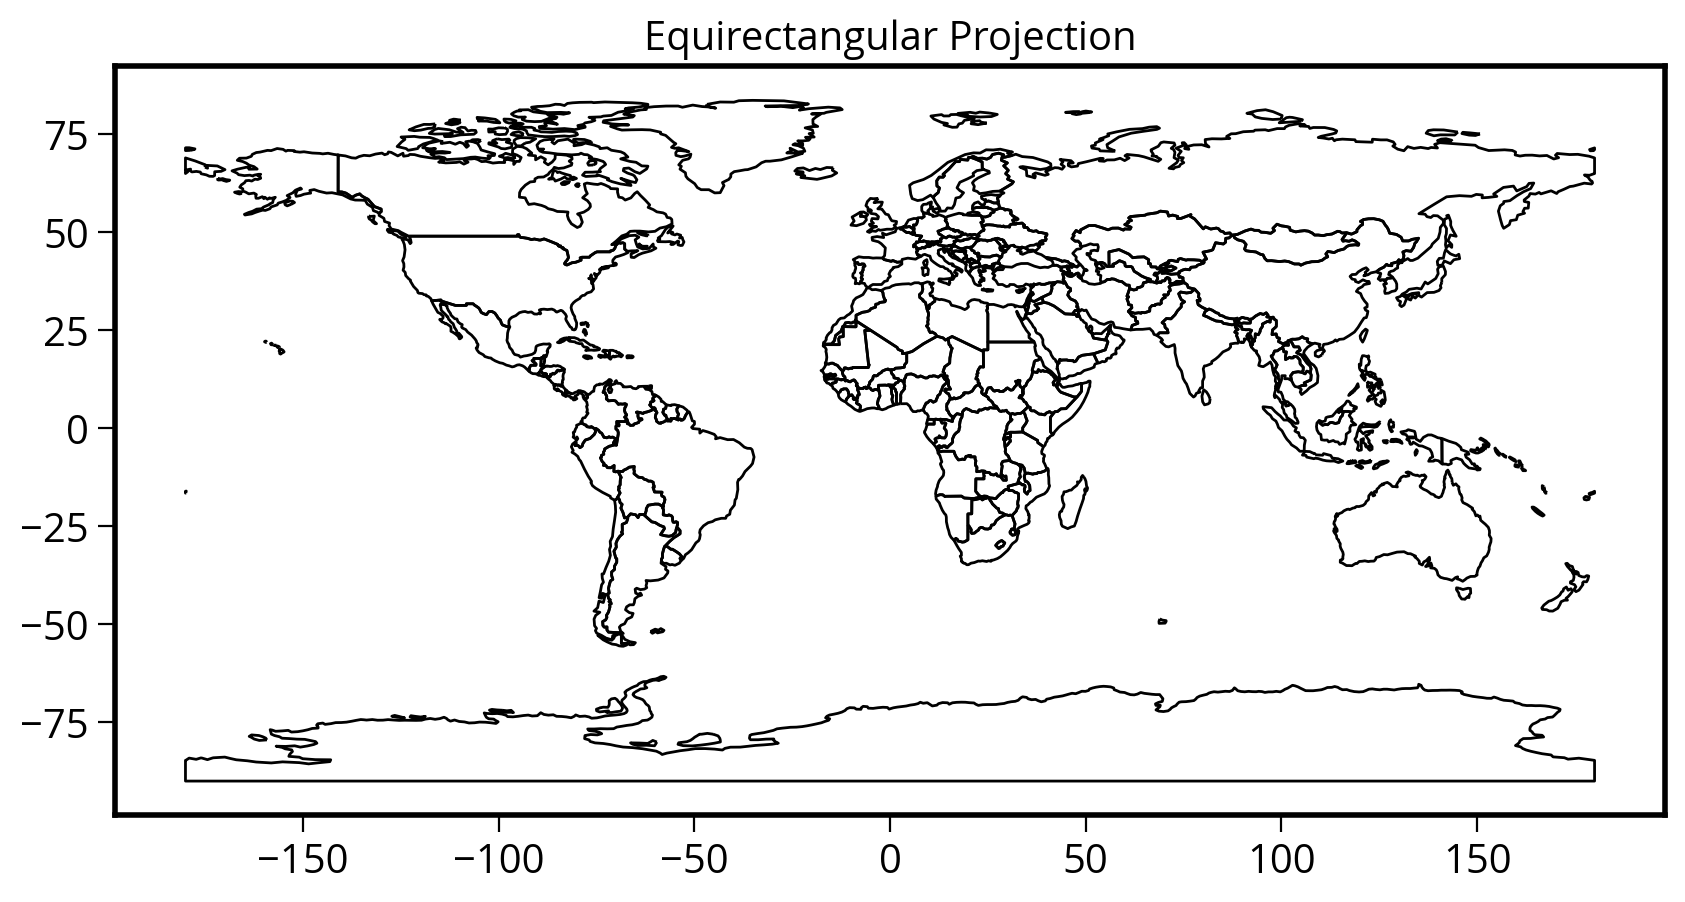

In [33]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the countries on our axes
ax = countries.plot(ax=ax, facecolor="none", edgecolor="black")

# Add a title
ax.set_title("Equirectangular Projection")

<center>
    <img src=attachment:platecarree.png width=700></img>
</center>
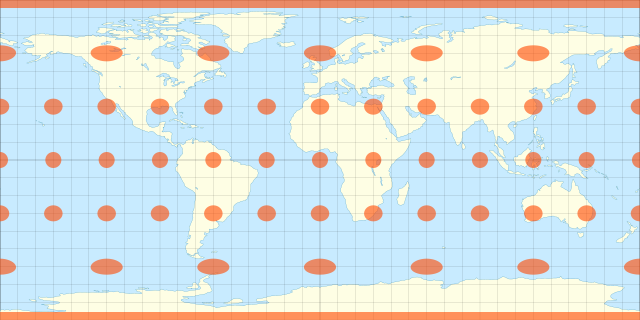

## Can we convert to other geometries?

Use the `to_crs()` function. The most well-known projections can be specified by their EPSG code.

Geopandas documentation on re-projecting: [Managing Projections](https://geopandas.org/projections.html#re-projecting)

## Let's convert to the Mercator projection

[EPSG code: 3395](http://spatialreference.org/ref/epsg/wgs-84-world-mercator/)

In [34]:
# Remove Antartica, as the Mercator projection 
# cannot deal with the poles
no_antartica = countries.loc[(countries['name'] != "Antarctica")]  

In [35]:
# Two ways to specify the EPSG code
countries_mercator = no_antartica.to_crs(epsg=3395)

# Alternatively:
#countries_mercator = no_antartica.to_crs("EPSG:3395")

In [36]:
countries_mercator.head() 

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((6813956.990 4227673.562, 6927484.435..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((2660998.216 -1305442.810, 2680..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((2339940.185 4961221.199, 2337708.178..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((5741805.754 2765811.385, 5761611.935..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-7453944.198 -7306880.704, -75..."


**Note:** the magnitude of the values in the geometry column changed! A quick and easy way to tell if the re-projection worked properly!

## Now let's plot it

The easy way...with geopandas built-in `plot()` function

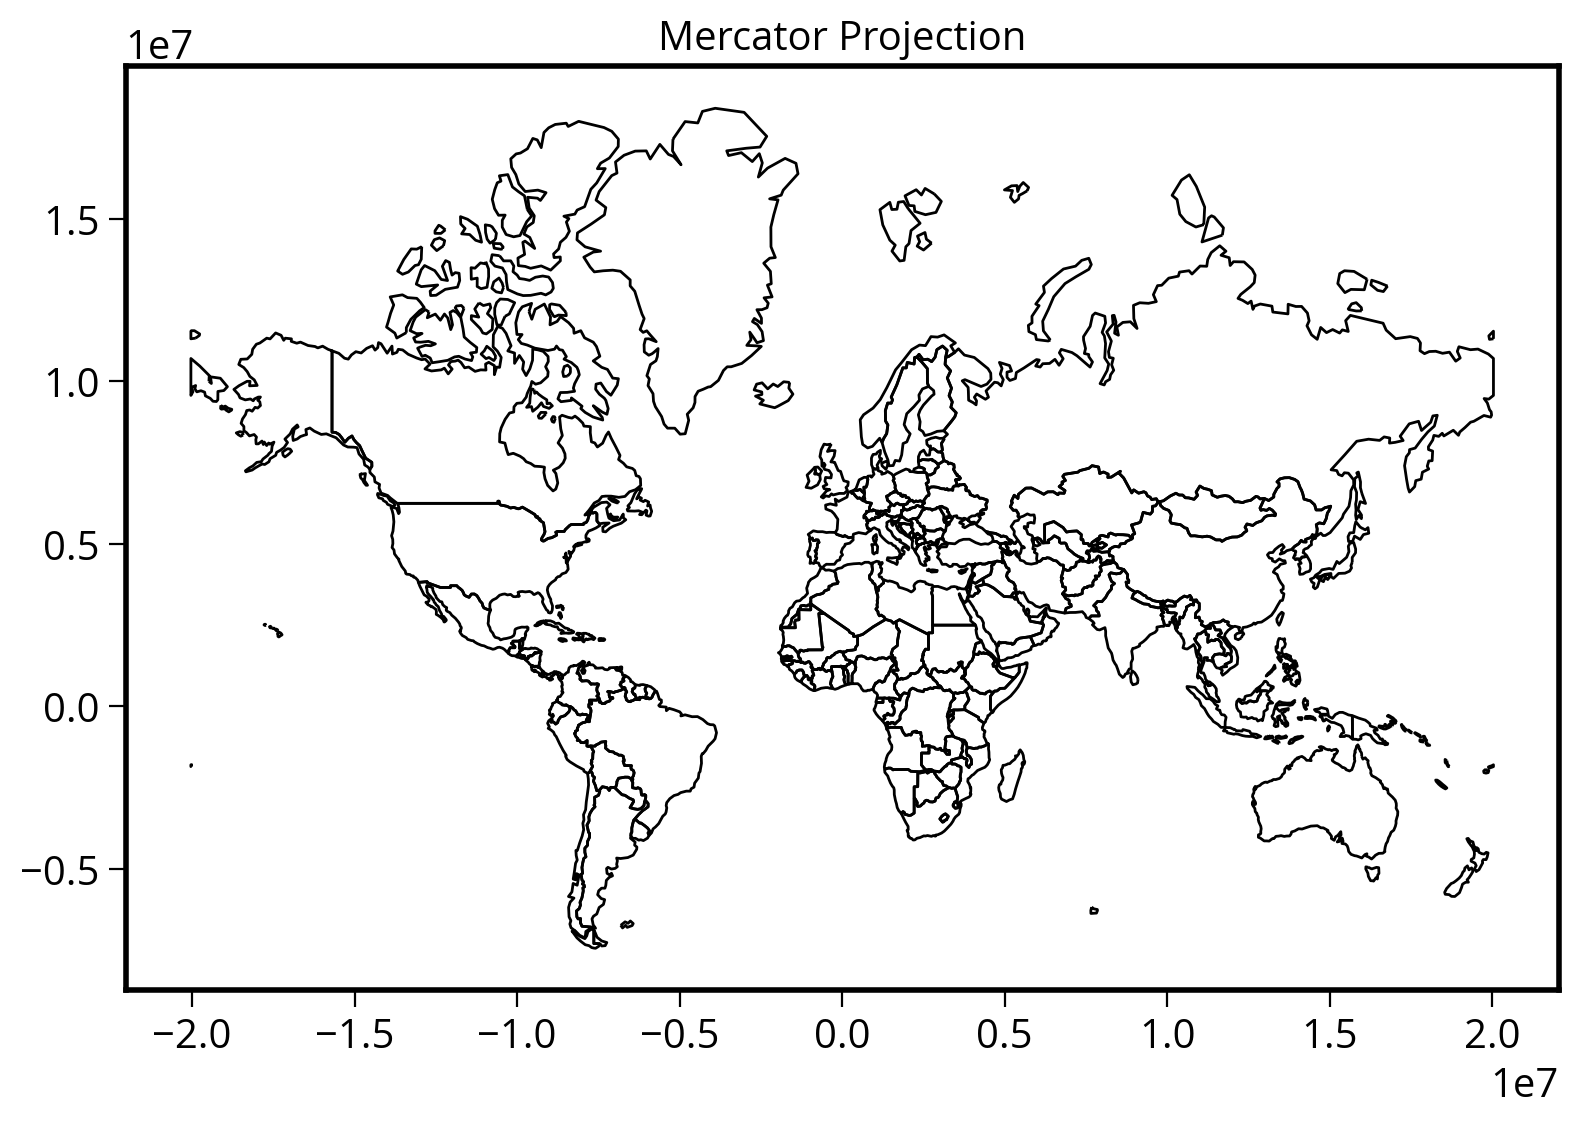

In [37]:
# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Use built-in plot() of the GeoDataFrame
ax = countries_mercator.plot(ax=ax, 
                             facecolor="none", 
                             edgecolor="black")

# Add a title
ax.set_title("Mercator Projection");

<center>
    <img src=attachment:mercator.png width=500></img>
</center>
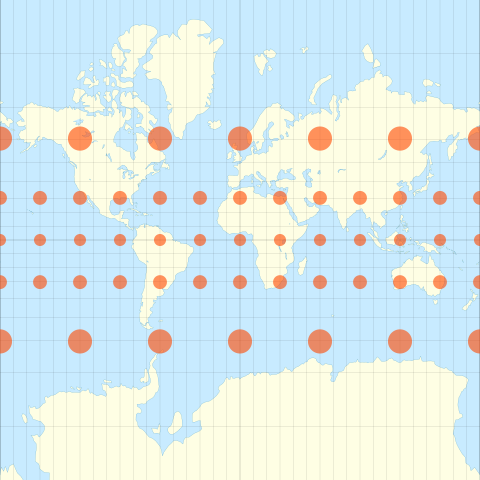

## So which CRS is best?

- For city-based data, usually Web Mercator ([EPSG=3857](https://epsg.io/3857)) is best
- Can also use a CRS specific to individual states, e.g., [PA State Plane EPSG=2272](https://epsg.io/2272)

## Let's load the city limits for Philadelphia

We'll use the provided `City_Limits` shape file in the `data/` folder

In [38]:
city_limits = gpd.read_file('./data/City_Limits')

city_limits

,OBJECTID,Shape__Are,Shape__Len,geometry
0,1,0.038911,1.259687,"POLYGON ((-75.01497 40.13793, -75.01456 40.137..."


## What's the CRS?

Use the `.crs` attribute to find out!

In [39]:
city_limits.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

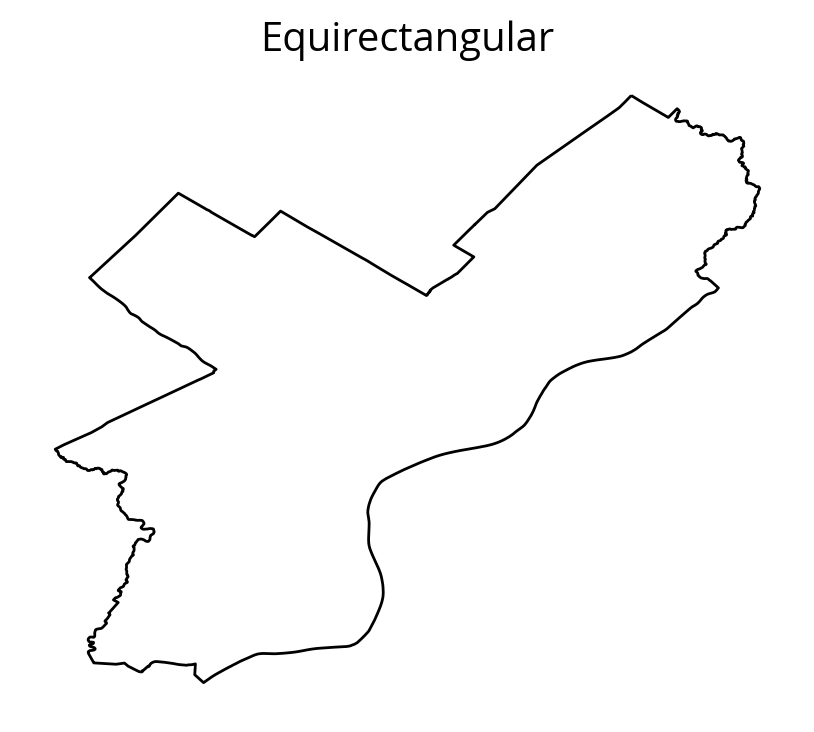

In [40]:
# Create our figure and axes
fig, ax = plt.subplots(figsize=(5, 5))

# Plot
city_limits.plot(ax=ax, facecolor="none", edgecolor="black")

# Format
ax.set_title("Equirectangular")
ax.set_axis_off() # This will remove the axes completely
ax.set_aspect("equal") # This forces an equal aspect ratio

This is *not* what Philadelphia looks like..

Let's try EPSG=3857 instead:

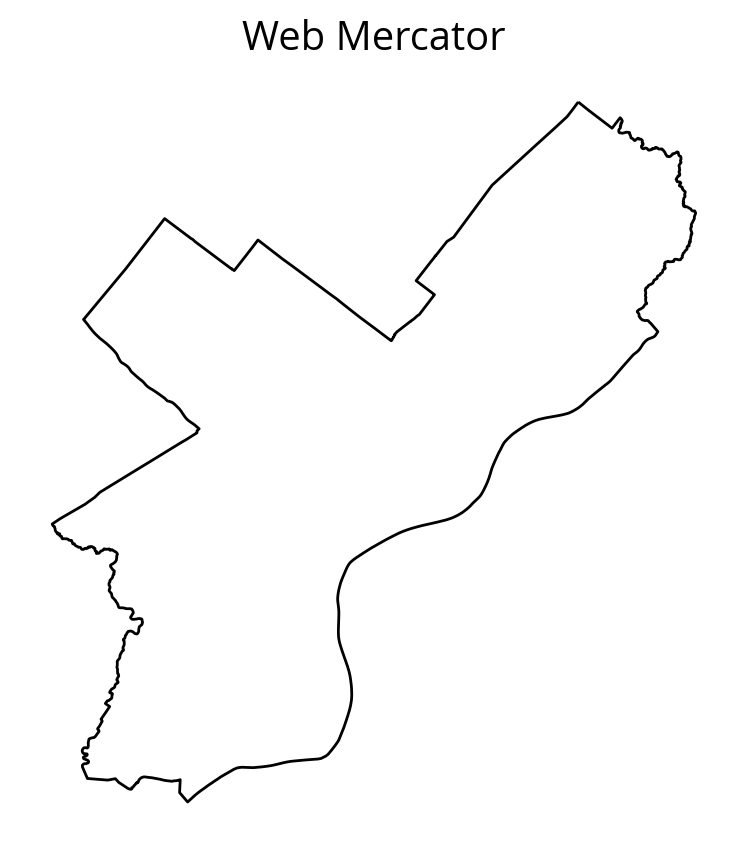

In [41]:
# Create the figure
fig, ax = plt.subplots(figsize=(5, 5))

# Convert to EPSG:3857
city_limits_3857 = city_limits.to_crs(epsg=3857)

# Plot and format
city_limits_3857.plot(ax=ax, facecolor="none", edgecolor="black")

ax.set_title("Web Mercator")
ax.set_axis_off()
ax.set_aspect("equal");

**Important:** the equirectangular CRS (EPSG=4326) is often used by default and will make cities appear wider and flatter than they really are 

## Saving GeoDataFrames


Use the `to_file()` function and specify the driver.

In [42]:
# ESRI shape file
city_limits_3857.to_file("./data/city_limits_3857", 
                         driver='ESRI Shapefile') 

In [43]:
# GeoJSON is also an option
city_limits_3857.to_file("./data/city_limits_3857.geojson", 
                         driver='GeoJSON')

## How about as a CSV file?

Yes, but reading requires more work...

In [44]:
# save a csv file
city_limits_3857.to_csv("./data/city_limits_3857.csv", index=False)

In [45]:
df = pd.read_csv("./data/city_limits_3857.csv")
df.head()

,OBJECTID,Shape__Are,Shape__Len,geometry
0,1,0.038911,1.259687,"POLYGON ((-8350627.97509646 4886006.88680784, ..."


## Looks similar...

**But,** the "geometry" column is just stored as a string...it's not a shapely Polygon

In [46]:
type(df.geometry) 

pandas.core.series.Series

## Use `shapely` to parse the string version of the polygons

In [47]:
from shapely import wkt

# wkt.loads will convert from string to Polygon object
df['geometry'] = df['geometry'].apply(wkt.loads)

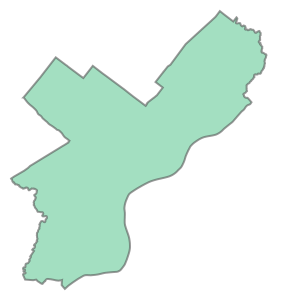

In [48]:
df.geometry.iloc[0] 

## Converting from a DataFrame to a GeoDataFrame

We can initialize the GeoDataFrame directly from a DataFrame but we need to specify **two things**:

1. The name of the "geometry" column 
2. The CRS of the "geometry" column

In this case, the geometry column was saved in Web Mercator EPSG=3857

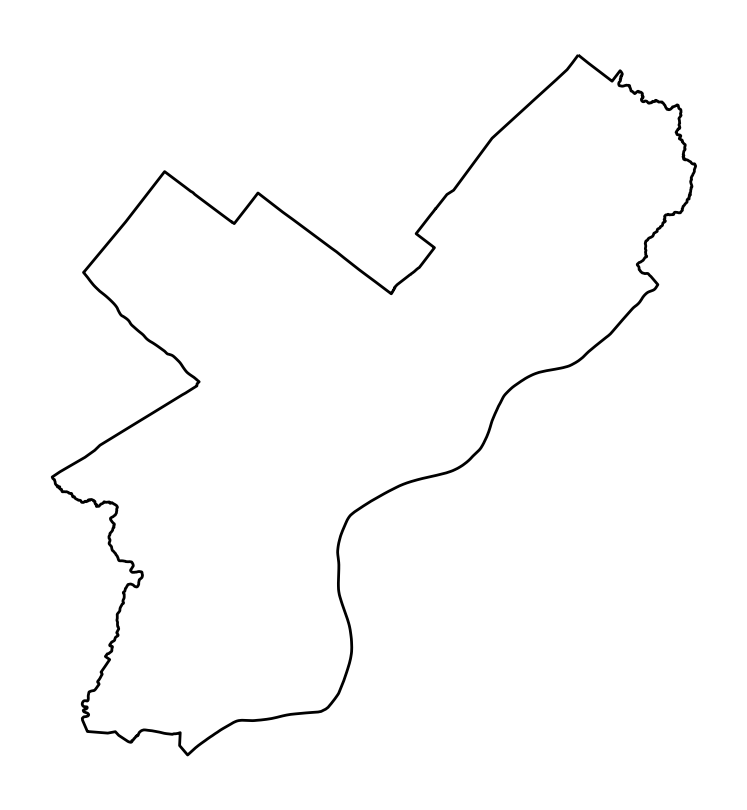

In [49]:
# Make specifying the name of the geometry column and CRS
gdf= gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:3857")

# Now plot
fig, ax = plt.subplots(figsize=(5,5))
ax = gdf.plot(ax=ax, facecolor='none', edgecolor='black')
ax.set_axis_off()
ax.set_aspect("equal")

## Let's convert back to 4326 and plot 

The tilt should be a bit more obvious now...

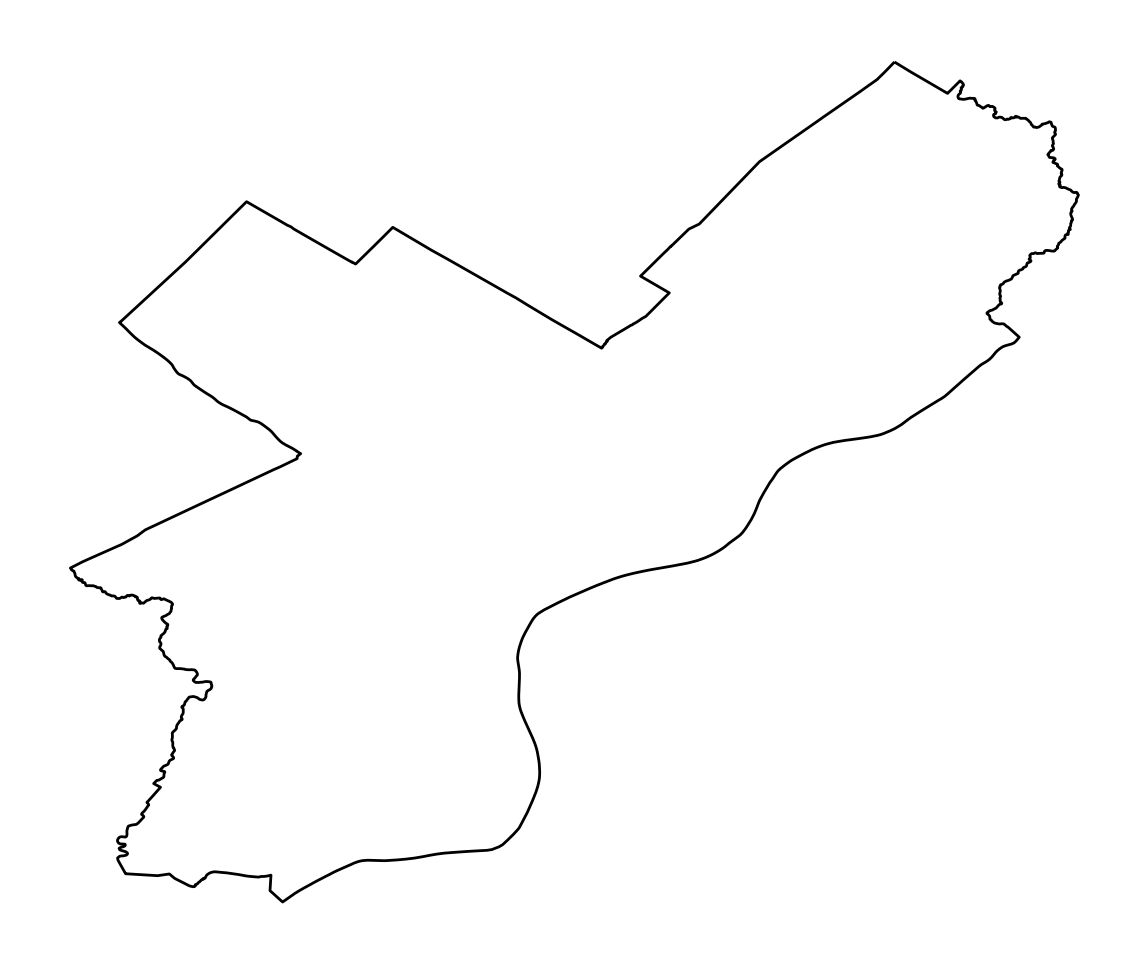

In [50]:
ax = (
    gdf.to_crs(epsg=4326)
      .plot(facecolor='none', edgecolor='black')
)
 
ax.set_axis_off()
ax.set_aspect("equal")

### Note

- I didn't use `plt.subplots()` here to create a figure/axes – I let geopandas automatically make one
- I've chained together the `to_crs()` and `.plot()` functions in one line
- The `.plot()` function returns the axes object that geopandas used to plot — this lets you customizes the axes after plotting

## So, when should you use GeoPandas?

- For exploratory data analysis and visualization, including in Jupyter notebooks
- Pre-processing data to be fed into a desktop GIS program
- For compact, readable, and reproducible code
- If you’re comfortable with Pandas and/or R data frames.

## When it may not be the best tool:

- For polished multilayer map creation — one option is to use a desktop GIS like QGIS.
- If you need very high performance — geopandas can be slow compared to other GIS software.

## Spatial Relationships and Joins

In [51]:
# Load some cities data
cities = gpd.read_file("./data/ne_110m_populated_places")

In [52]:
cities

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)
...,...,...
238,Rio de Janeiro,POINT (-43.22697 -22.92308)
239,São Paulo,POINT (-46.62697 -23.55673)
240,Sydney,POINT (151.18323 -33.91807)
241,Singapore,POINT (103.85387 1.29498)


<center>
    <img src=attachment:TopologicSpatialRelarions2.png width=600></img>
</center>

(Image by [Krauss, CC BY-SA 3.0](https://en.wikipedia.org/wiki/Spatial_relation#/media/File:TopologicSpatialRelarions2.png))
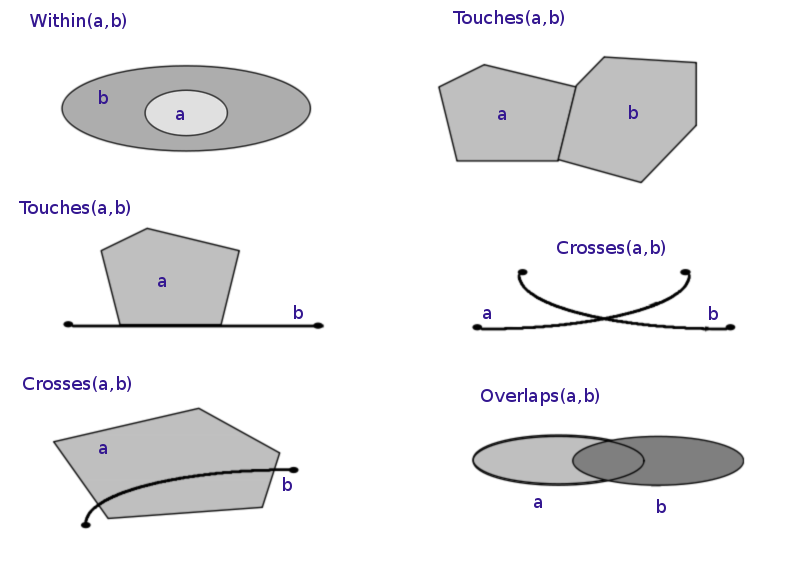

All of these operations are available as functions of a `GeoDataFrame`.

## A quick example

What country is New York in?

**Spoiler**: the USA

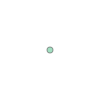

In [53]:
# Select the Point representing New York City
new_york = cities.loc[cities['name'] == 'New York'].geometry.squeeze()
new_york

In [54]:
type(new_york)

shapely.geometry.point.Point

In [55]:
countries.contains(new_york)

0      False
1      False
2      False
3      False
4      False
       ...  
172    False
173    False
174    False
175    False
176    False
Length: 177, dtype: bool

In [56]:
# Find the country that contains New York
countries.loc[countries.contains(new_york)]

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
168,USA,United States of America,North America,326625791.0,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


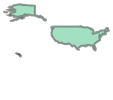

In [57]:
# Get the geometry column of the country containing NYC
USA = countries.loc[countries.contains(new_york)].squeeze().geometry
USA

### Note

The `.loc[]` function can take the index selector as the first argument, and the name of a column as a second argument (separated by a comma)

In [58]:
type(USA)

shapely.geometry.multipolygon.MultiPolygon

In [59]:
# Is New York within the USA?
new_york.within(USA)

True

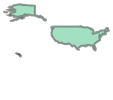

In [60]:
USA

### Reference

The different functions for checking spatial relationships:

- `equals`
- `contains`
- `crosses`
- `disjoint`
- `intersects`

- `overlaps`
- `touches`
- `within`
- `covers`

See [the shapely documentation](https://shapely.readthedocs.io/en/stable/manual.html#predicates-and-relationships) for an overview of these methods.

## More next time...

## That's it!

- We'll continue with geopandas and geospatial data viz next time
- See you on Wednesday!